In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import matplotlib as mpl
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic.ttf')
plt.rc('font', family='NanumGothicBold.ttf')
plt.rc('font', family='NanumGothicExtraBold.ttf')
plt.rc('font', family='NanumGothicLight.ttf')
mpl.rcParams['font.family'] = "NanumGothic"
mpl.rcParams['font.size'] = 13

In [3]:
df = pd.read_csv('data/train.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [4]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
# 잔액이 0원이 아니고, 40대인 고객만 추출
data = df[(df['Balance'] !=0) & (df['Age'] >= 50) & (df['Age'] < 60)]
data.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
18,18,15671358,Hargreaves,645,Germany,Female,55.0,8,120105.43,1,1.0,0.0,125083.29,1
27,27,15765461,Shih,586,France,Female,58.0,2,147262.11,1,1.0,1.0,100835.19,0
32,32,15678626,Okonkwo,797,Spain,Female,55.0,0,99208.46,2,0.0,1.0,62402.38,1
34,34,15593973,Chiu,749,Germany,Male,50.0,5,132576.25,1,1.0,0.0,125939.18,1
39,39,15653849,Ting,747,Germany,Male,58.0,9,114514.71,1,1.0,0.0,45414.12,1
67,67,15706232,Hs?,648,Spain,Male,56.0,0,110939.30,1,1.0,1.0,92927.42,1
110,110,15782418,Chiagoziem,681,Germany,Male,58.0,9,130147.98,2,0.0,0.0,118749.58,1
128,128,15660809,Hsing,633,Germany,Female,52.0,3,103421.80,1,0.0,0.0,82298.81,1
152,152,15602344,Ch'ang,479,Germany,Female,58.0,2,131644.00,1,1.0,1.0,152733.89,1
191,191,15745417,Knipe,707,France,Male,58.0,9,89685.92,2,0.0,1.0,126471.13,0


## 지역별 고객 분포

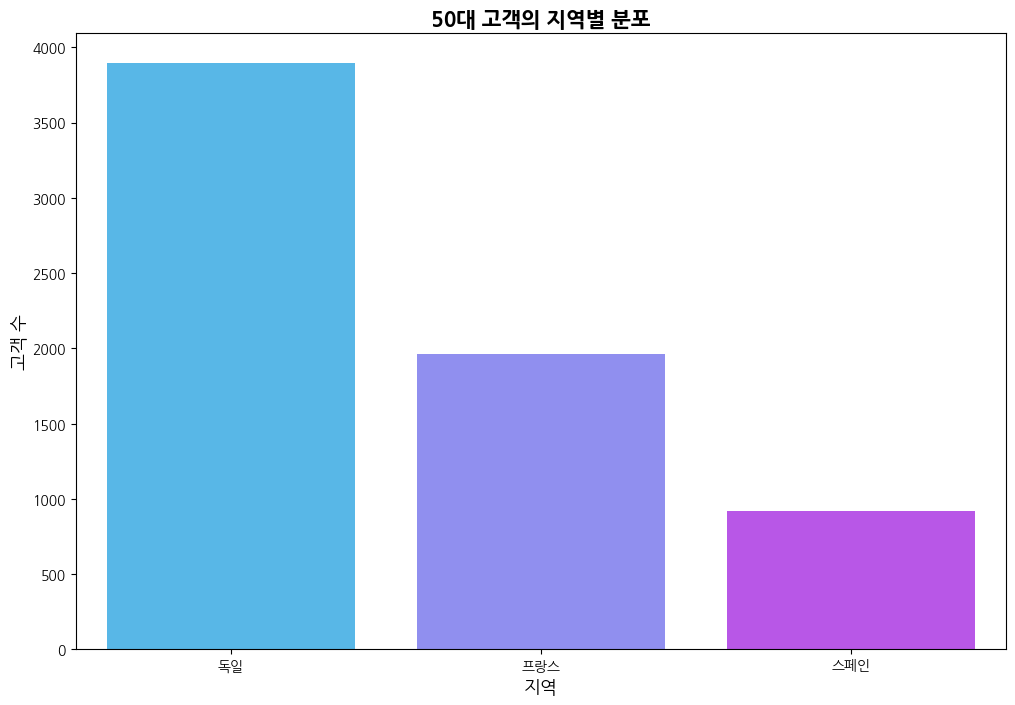

In [6]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import matplotlib.font_manager as fm

# 한글
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(12, 8))
new_x_labels = ['독일', '프랑스', '스페인']
ax = sns.countplot(x='Geography', data=data, palette='cool')

# 제목 및 레이블
plt.title('50대 고객의 지역별 분포', fontsize=15, fontweight='bold')
plt.xlabel('지역', fontsize=13)
plt.xticks(range(len(new_x_labels)), new_x_labels)  
plt.ylabel('고객 수', fontsize=13)
plt.show()

In [7]:
plt.savefig('40대 고객의 지역별 분포.png')

<Figure size 640x480 with 0 Axes>

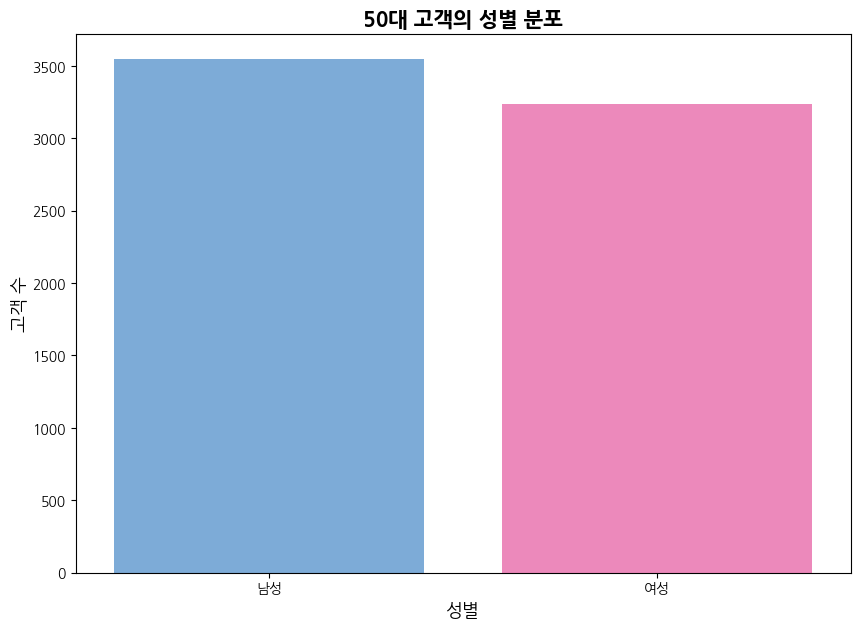

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(10, 7))
new_x_labels = ['남성', '여성']
ax = sns.countplot(x='Gender', data=data, palette=['#6EACE6', '#FD78BB'])

# 제목 및 레이블 설정
plt.title('50대 고객의 성별 분포', fontsize=15, fontweight='bold')
plt.xlabel('성별', fontsize=13)
plt.xticks(range(len(new_x_labels)), new_x_labels)
plt.ylabel('고객 수', fontsize=13)
sns.set_style("whitegrid")
plt.show()

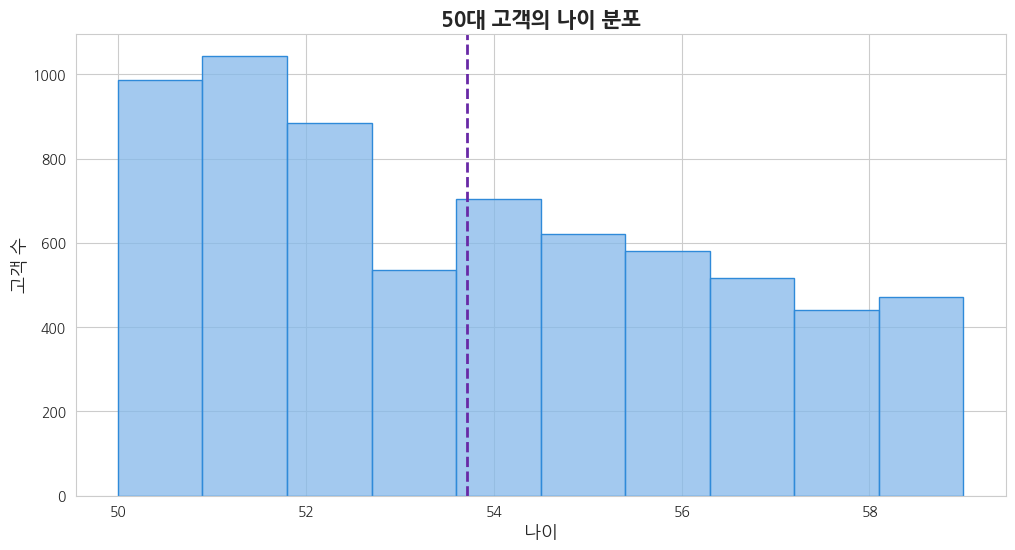

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False 

# 그래프 사이즈 설정
plt.figure(figsize=(12, 6))

# 색상 설정
hist_color = '#84B8EA'
edge_color = '#2F8AD9'

# 히스토그램 생성 및 색상 설정
sns.histplot(data['Age'], bins=10, color=hist_color, edgecolor=edge_color)

# 평균 나이 선 추가
plt.axvline(data['Age'].mean(), color='#6829A6', linestyle='dashed', linewidth=2)

# 추가 세부 사항
plt.title('50대 고객의 나이 분포', fontsize=15, fontweight='bold')
plt.xlabel('나이', fontsize=13)
plt.ylabel('고객 수', fontsize=13)

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

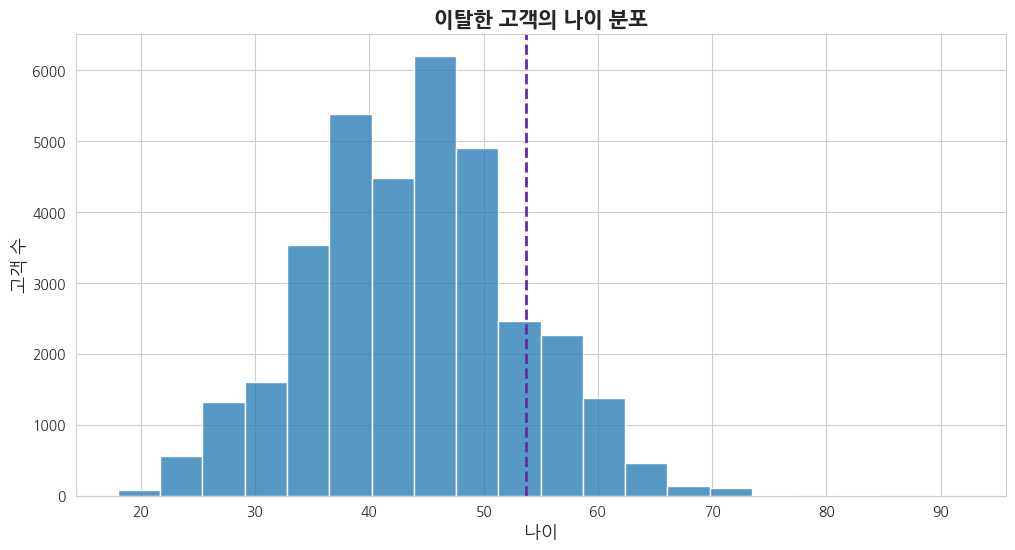

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False 
df_e = df[df['Exited'] == 1]


plt.figure(figsize=(12, 6))
sns.histplot(df_e['Age'], bins=20)

# 평균선 
plt.axvline(data['Age'].mean(), color='#6829A6', linestyle='dashed', linewidth=2)

# 세부 사항
plt.title('이탈한 고객의 나이 분포', fontsize=15, fontweight='bold')
plt.xlabel('나이', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.grid(True)

# 그래프 표시
plt.show()

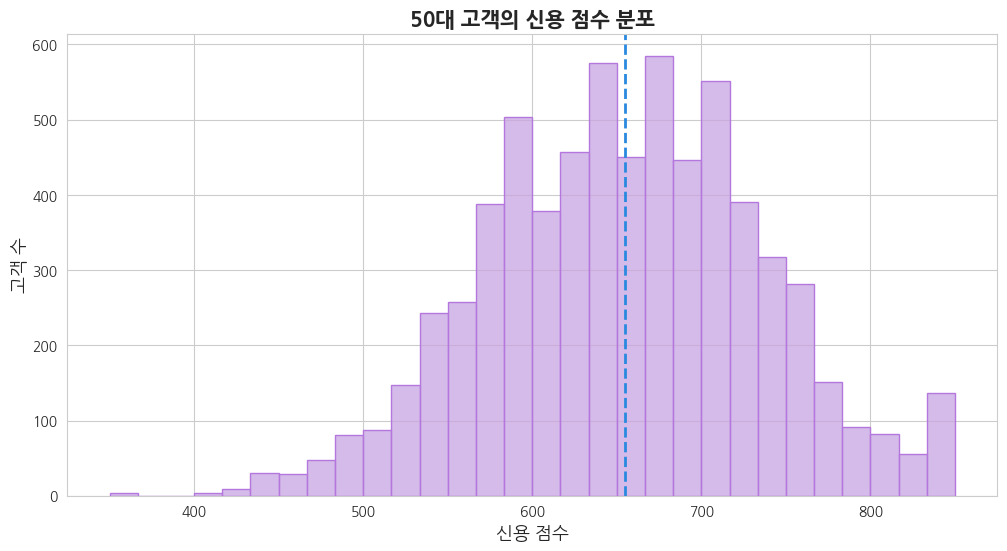

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False 

# 그래프 사이즈 설정
plt.figure(figsize=(12, 6))

# 히스토그램 생성
sns.histplot(data['CreditScore'], bins=30, color='#C8A4E2', edgecolor='#B477DD')

# 평균 신용 점수 선 추가
plt.axvline(data['CreditScore'].mean(), color='#2989DF', linestyle='dashed', linewidth=2)

# 추가 세부 사항
plt.title('50대 고객의 신용 점수 분포', fontsize=15, fontweight='bold')
plt.xlabel('신용 점수', fontsize=13)
plt.ylabel('고객 수', fontsize=13)

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

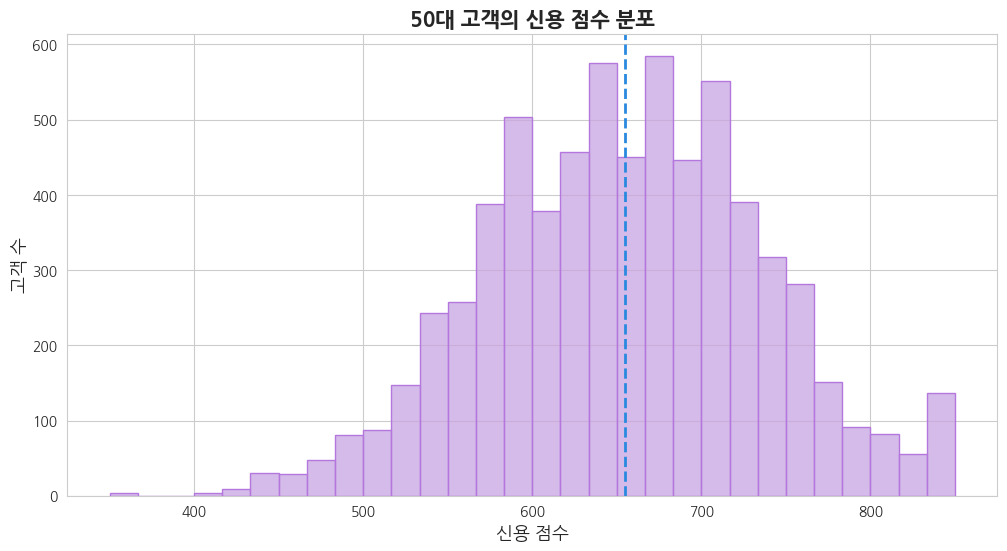

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False 

# 그래프 사이즈 설정
plt.figure(figsize=(12, 6))
sns.histplot(data['CreditScore'], bins=30, color='#C8A4E2', edgecolor='#B477DD')

# 평균선
plt.axvline(data['CreditScore'].mean(), color='#2989DF', linestyle='dashed', linewidth=2)

# 세부 사항
plt.title('50대 고객의 신용 점수 분포', fontsize=15, fontweight='bold')
plt.xlabel('신용 점수', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.grid(True)

plt.show()

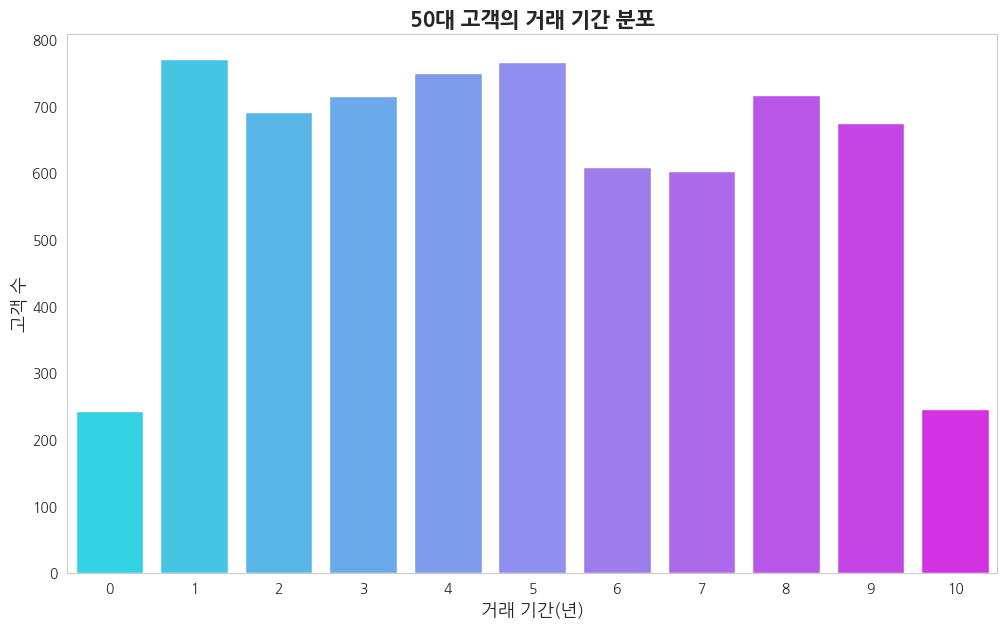

In [13]:
# 그래프 사이즈 설정
plt.figure(figsize=(12, 7))

# 카운트 플롯 생성
ax = sns.countplot(x='Tenure', data=data, palette='cool')

# 제목 및 레이블 설정
plt.title('50대 고객의 거래 기간 분포', fontsize=15, fontweight='bold')
plt.xlabel('거래 기간(년)', fontsize=13)
plt.ylabel('고객 수', fontsize=13)

# 그리드 추가
plt.grid(axis='y')

# 그래프 표시
plt.show()

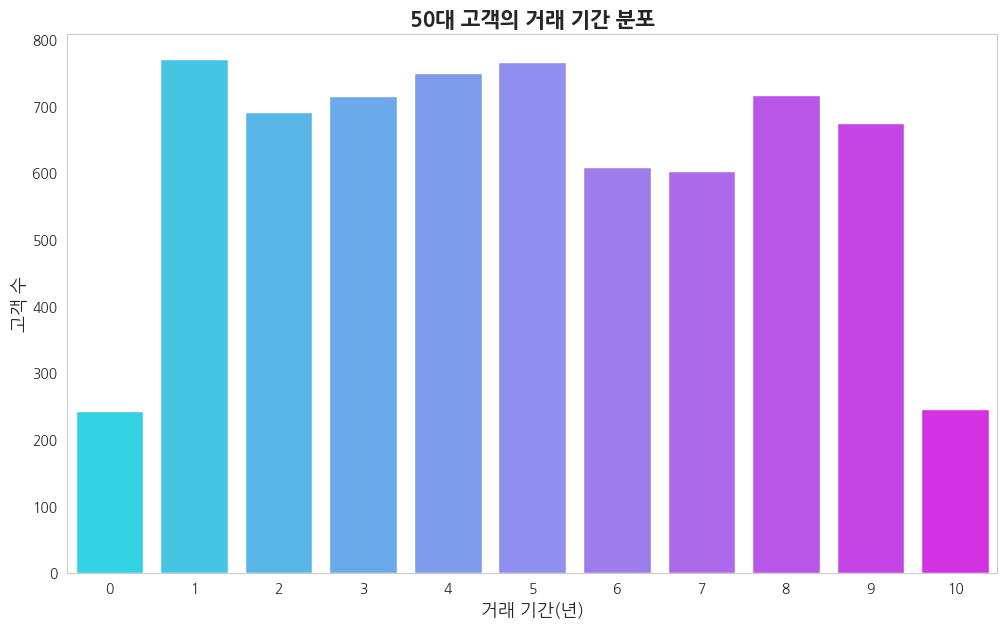

In [14]:
# 그래프 사이즈 설정
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='Tenure', data=data, palette='cool')
plt.title('50대 고객의 거래 기간 분포', fontsize=15, fontweight='bold')
plt.xlabel('거래 기간(년)', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.grid(axis='y')

plt.show()

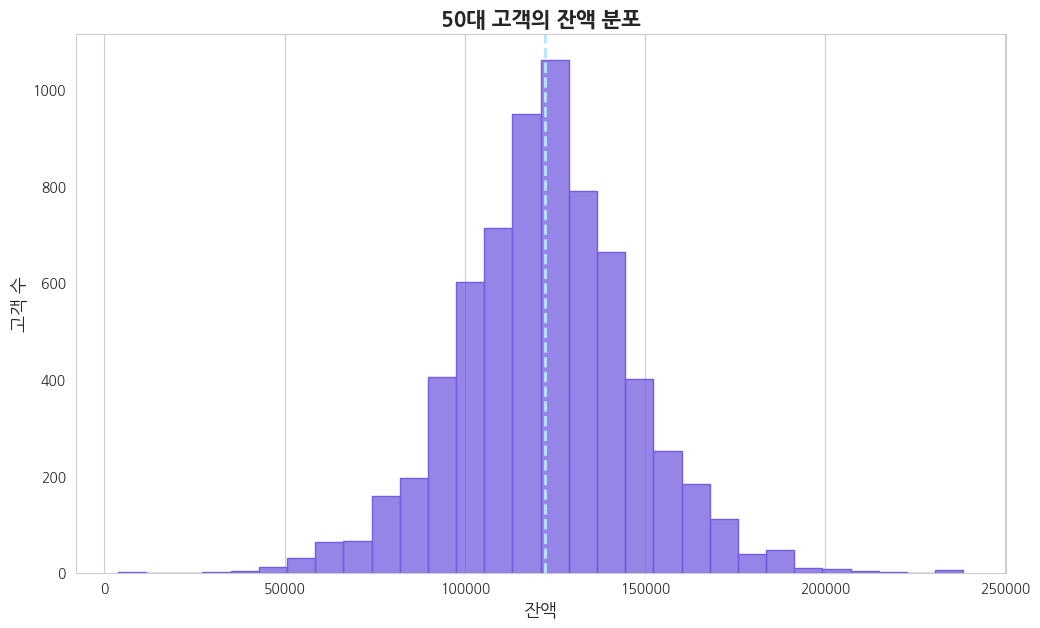

In [15]:
# 그래프 사이즈 설정
plt.figure(figsize=(12, 7))

# 히스토그램 및 KDE(커널 밀도 추정) 플롯 생성
sns.histplot(data['Balance'], bins=30, color='#735CE0', edgecolor='#735CE0')

# 평균 잔액 선 추가
plt.axvline(data['Balance'].mean(), color='#B6E7FD', linestyle='dashed', linewidth=2)

# 추가 세부 사항
plt.title('50대 고객의 잔액 분포', fontsize=15, fontweight='bold')
plt.xlabel('잔액', fontsize=13)
plt.ylabel('고객 수', fontsize=13)


# 그리드 추가
plt.grid(axis='y')
# 그래프 표시
plt.show()

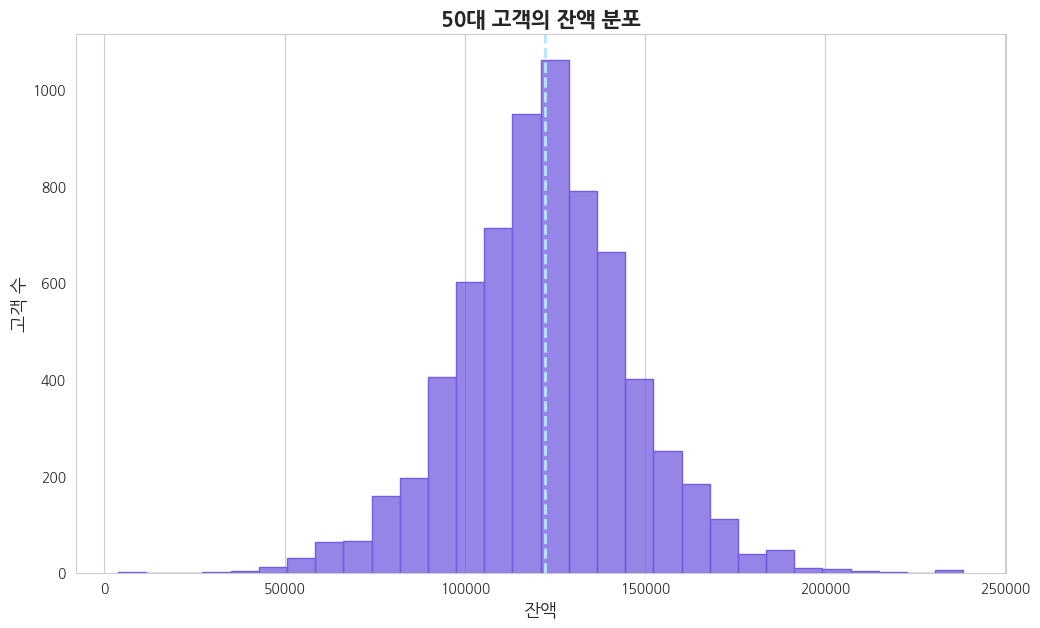

In [16]:
# 그래프 사이즈 설정
plt.figure(figsize=(12, 7))
sns.histplot(data['Balance'], bins=30, color='#735CE0', edgecolor='#735CE0')

plt.axvline(data['Balance'].mean(), color='#B6E7FD', linestyle='dashed', linewidth=2)
plt.title('50대 고객의 잔액 분포', fontsize=15, fontweight='bold')
plt.xlabel('잔액', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.grid(axis='y')
plt.show()

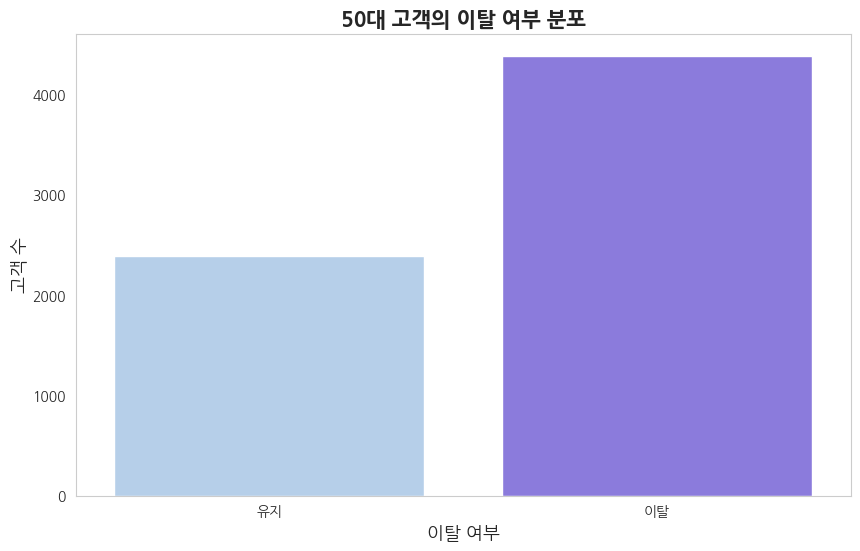

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 사이즈 설정
plt.figure(figsize=(10, 6))

# 카운트 플롯 생성
ax = sns.countplot(x='Exited', data=data, palette=['#ADCFF2', '#806BEC'])

# x축 레이블 설정
ax.set_xticklabels(['유지', '이탈'])

# 제목 및 레이블 설정
plt.title('50대 고객의 이탈 여부 분포', fontsize=15, fontweight='bold')
plt.xlabel('이탈 여부', fontsize=13)
plt.ylabel('고객 수', fontsize=13)

# 그리드 추가
plt.grid(axis='y')

# 그래프 표시
plt.show()


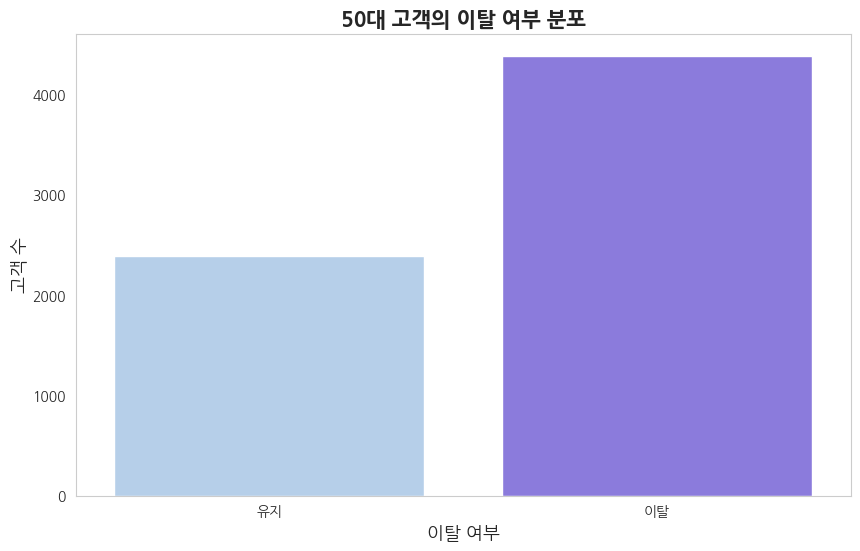

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 사이즈 설정
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Exited', data=data, palette=['#ADCFF2', '#806BEC'])

# 레이블 설정
ax.set_xticklabels(['유지', '이탈'])
plt.title('50대 고객의 이탈 여부 분포', fontsize=15, fontweight='bold')
plt.xlabel('이탈 여부', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.grid(axis='y')
plt.show()

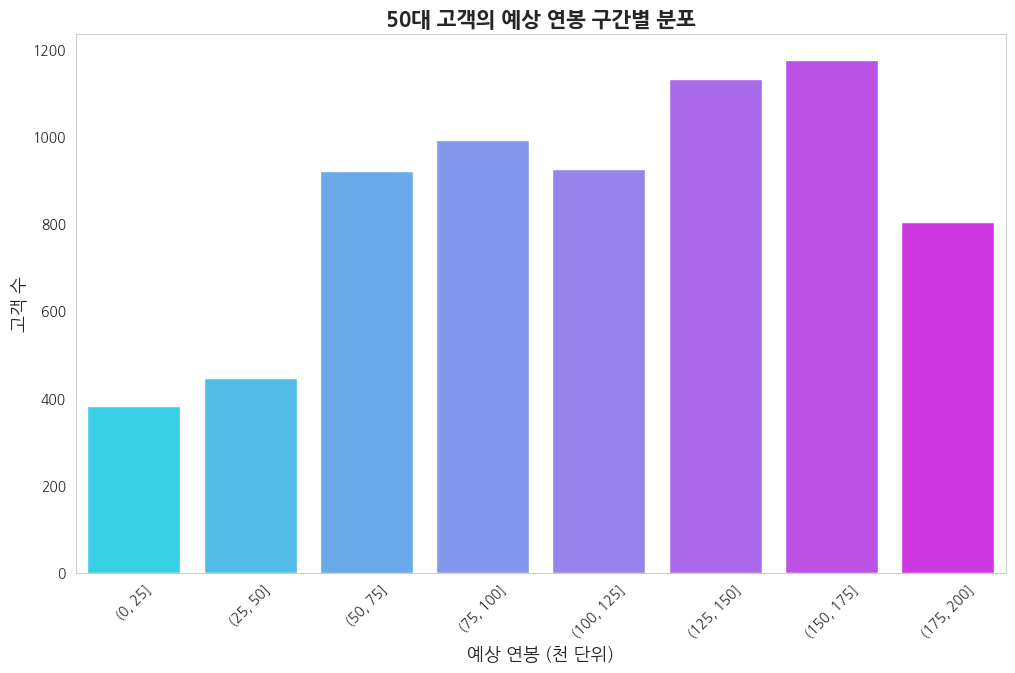

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False 

# 천 단위로 나누기
data.loc[:, 'EstimatedSalary_thousands'] = data['EstimatedSalary'] / 1000

# 구간별 빈도수 계산
salary_bins = pd.cut(data['EstimatedSalary_thousands'], bins=[0, 25, 50, 75, 100, 125, 150, 175, 200])
salary_bin_counts = salary_bins.value_counts().sort_index()

# 구간별 빈도수 시각화
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=salary_bin_counts.index.astype(str), y=salary_bin_counts.values, palette='cool')

plt.xticks(rotation=45)
plt.title('50대 고객의 예상 연봉 구간별 분포', fontsize=15, fontweight='bold')
plt.xlabel('예상 연봉 (천 단위)', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.grid(axis='y')
plt.show()

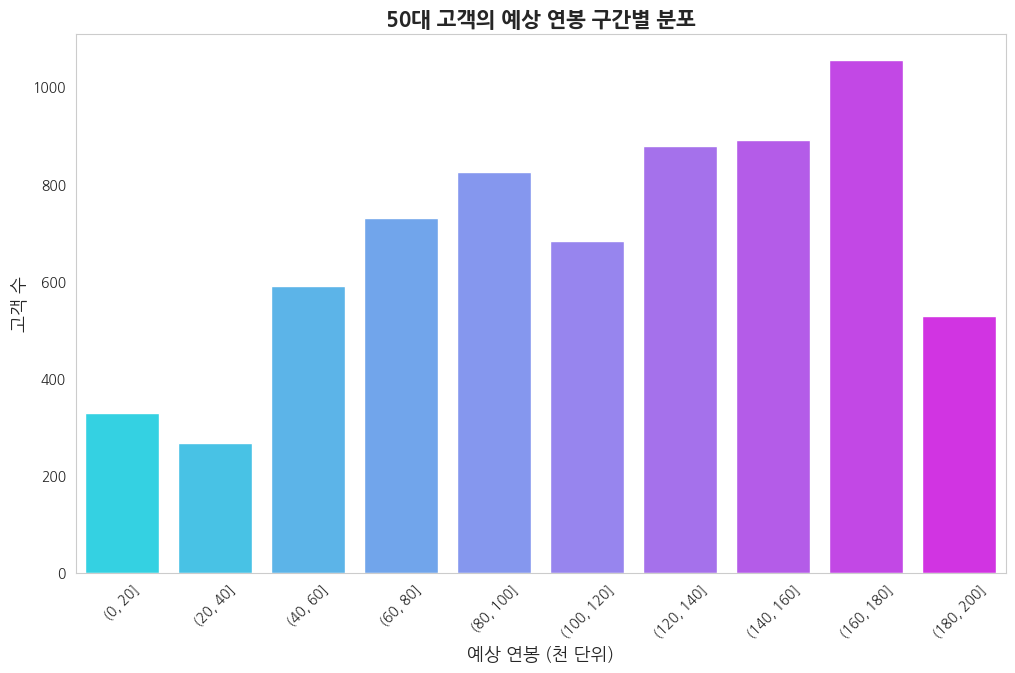

In [21]:
# 천 단위로 나누기
data.loc[:, 'EstimatedSalary_thousands'] = data['EstimatedSalary'] / 1000

# 빈도수 계산
salary_bins = pd.cut(data['EstimatedSalary_thousands'], bins=[0,20,40,60,80,100,120,140,160,180,200])
salary_bin_counts = salary_bins.value_counts().sort_index()

# 빈도수 시각화
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=salary_bin_counts.index.astype(str), y=salary_bin_counts.values, palette='cool')

plt.xticks(rotation=45)
plt.title('50대 고객의 예상 연봉 구간별 분포', fontsize=15, fontweight='bold')
plt.xlabel('예상 연봉 (천 단위)', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.grid(axis='y')
plt.show()

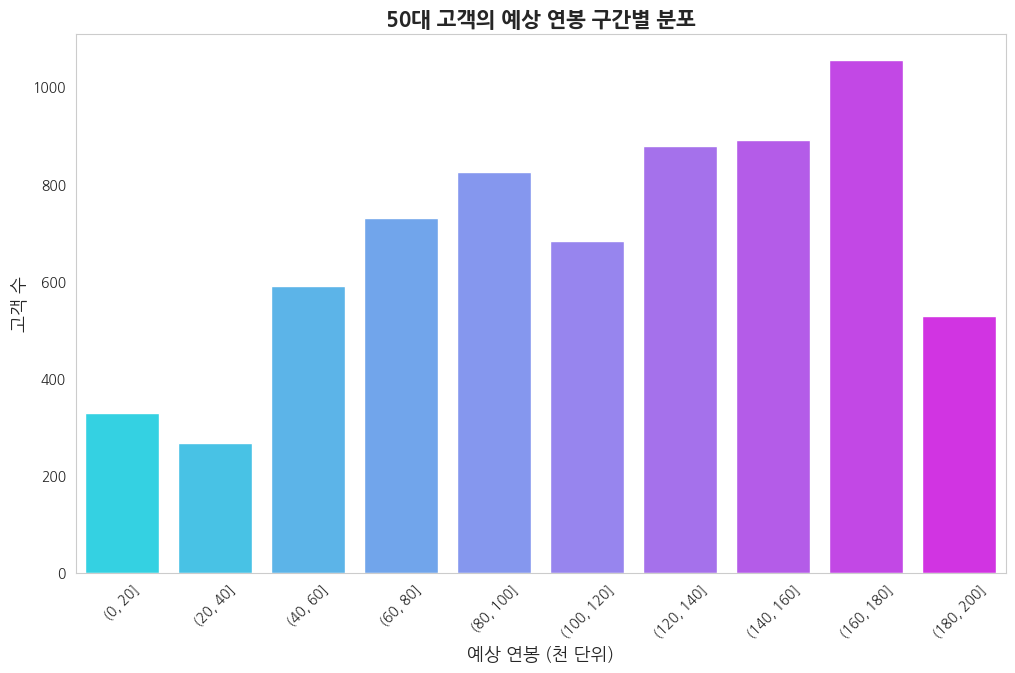

In [22]:
# 예상 연봉을 천 단위로 나누기
data.loc[:, 'EstimatedSalary_thousands'] = data['EstimatedSalary'] / 1000

# 예상 연봉 구간별 빈도수 계산
salary_bins = pd.cut(data['EstimatedSalary_thousands'], bins=[0,20,40,60,80,100,120,140,160,180,200])
salary_bin_counts = salary_bins.value_counts().sort_index()

# 구간별 빈도수 시각화
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=salary_bin_counts.index.astype(str), y=salary_bin_counts.values, palette='cool')

plt.xticks(rotation=45)
plt.title('50대 고객의 예상 연봉 구간별 분포', fontsize=15, fontweight='bold')
plt.xlabel('예상 연봉 (천 단위)', fontsize=13)
plt.ylabel('고객 수', fontsize=13)

# 그리드 추가
plt.grid(axis='y')

# 그래프 표시
plt.show()

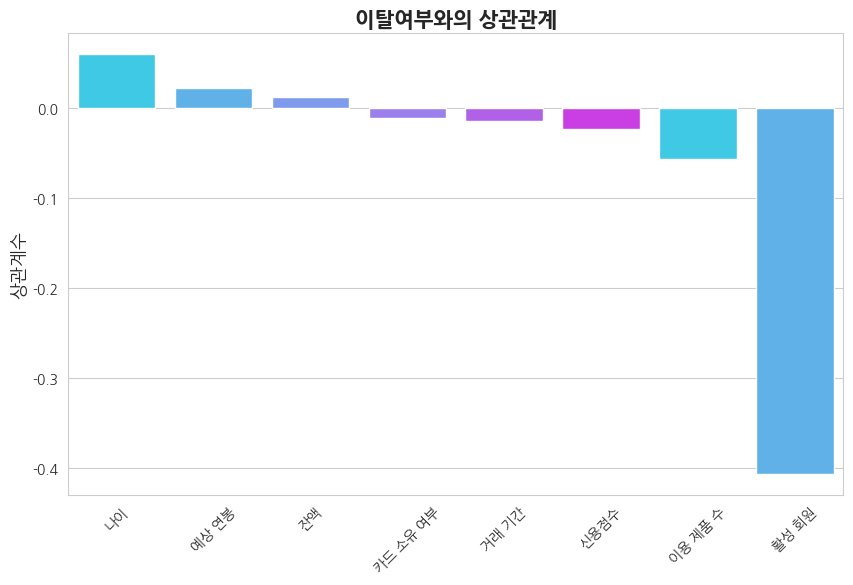

In [23]:
numeric_data = data.select_dtypes(include='number')  
correlation_matrix = numeric_data.corr()  

# Exited와 다른 변수들 간의 상관관계 추출 
correlation_with_exited = correlation_matrix['Exited'].drop(['Exited', 'id', 'CustomerId', 'EstimatedSalary_thousands']).sort_values(ascending=False)

# x축 레이블
new_x_labels = ['나이', '예상 연봉', '잔액', '카드 소유 여부', '거래 기간', '신용점수', '이용 제품 수', '활성 회원']

# 시각화
cool_palette = sns.color_palette("cool")
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_exited.index, y=correlation_with_exited.values, palette=cool_palette)
plt.title('이탈여부와의 상관관계', fontsize=15, fontweight='bold')
plt.xticks(range(len(new_x_labels)), new_x_labels, rotation=45)  # 새로운 레이블로 설정
plt.ylabel('상관계수', fontsize=13)
plt.show()

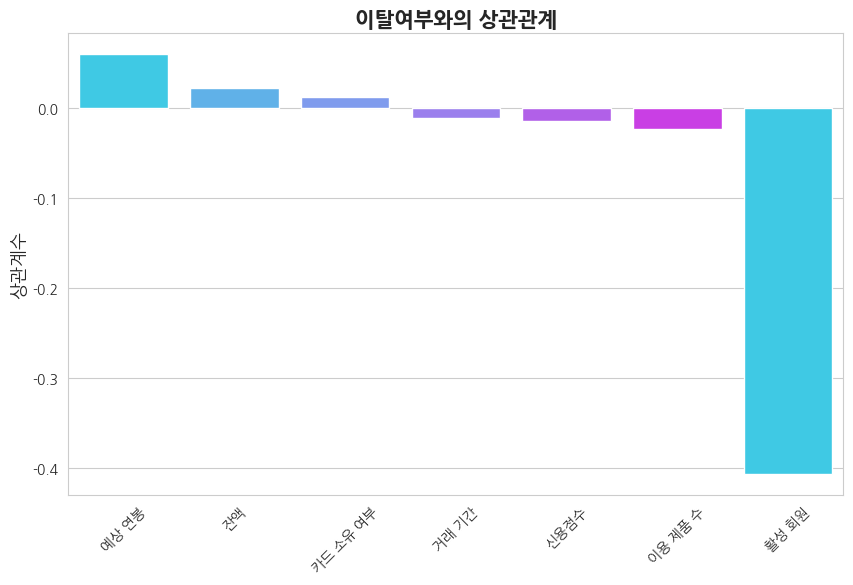

<Figure size 640x480 with 0 Axes>

In [24]:
numeric_data = data.select_dtypes(include='number')  # 숫자 데이터만 추출
correlation_matrix = numeric_data.corr()  # 상관관계 매트릭스 계산

# Exited와 다른 변수들 간의 상관관계 추출 (Exited 자체는 제외)
correlation_with_exited = correlation_matrix['Exited'].drop(['Exited', 'id', 'CustomerId', 'EstimatedSalary_thousands', 'Age']).sort_values(ascending=False)

# 새로운 x축 레이블 설정
new_x_labels = ['예상 연봉', '잔액', '카드 소유 여부', '거래 기간', '신용점수', '이용 제품 수', '활성 회원']

# 'cool' 팔레트 설정
cool_palette = sns.color_palette("cool")

# 상관관계 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_exited.index, y=correlation_with_exited.values, palette=cool_palette)
plt.title('이탈여부와의 상관관계', fontsize=15, fontweight='bold')
plt.xticks(range(len(new_x_labels)), new_x_labels, rotation=45)  # 새로운 레이블로 설정
plt.ylabel('상관계수', fontsize=13)
plt.show()
plt.savefig('이탈여부와의 상관관계.png')

In [25]:
data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalary_thousands
count,6782.000000,6.782000e+03,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000
mean,82228.722943,1.569239e+07,654.663963,53.715128,4.903716,122206.935370,1.316278,0.729136,0.462843,113112.765506,0.646859,113.112766
std,47524.050660,7.163796e+04,81.552685,2.850490,2.836032,24140.105111,0.618806,0.444439,0.498654,50729.000683,0.477981,50.729001
min,18.000000,1.556576e+07,350.000000,50.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000,0.011580
25%,41195.500000,1.563393e+07,595.000000,51.000000,2.000000,106929.412500,1.000000,0.000000,0.000000,73681.380000,0.000000,73.681380
50%,81518.500000,1.569060e+07,653.000000,53.000000,5.000000,122217.105000,1.000000,1.000000,0.000000,119330.745000,1.000000,119.330745
75%,123518.250000,1.575581e+07,711.000000,56.000000,7.000000,137236.137500,1.000000,1.000000,1.000000,157391.962500,1.000000,157.391962
max,165026.000000,1.581569e+07,850.000000,59.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199775.670000,1.000000,199.775670


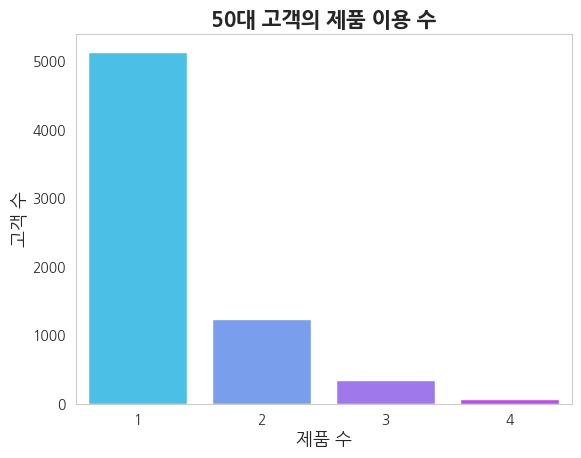

In [26]:
sns.countplot(x='NumOfProducts', data=data, palette='cool')

# 그리드 추가
plt.grid(axis='y')
plt.title('50대 고객의 제품 이용 수', fontsize=15, fontweight='bold')
plt.xlabel('제품 수', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.show()

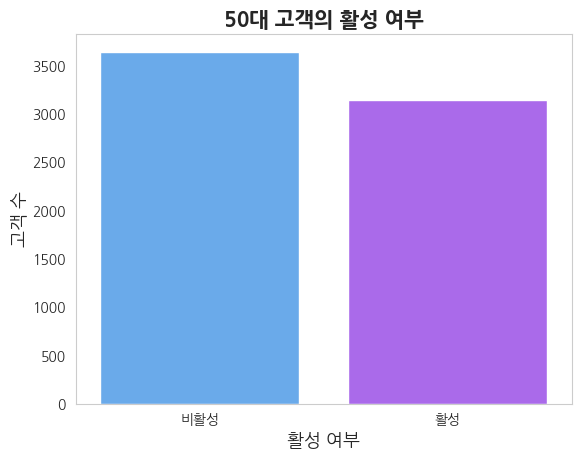

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터에서 'isactivemember' 컬럼을 사용하여 활성/비활성 회원의 분포를 시각화
sns.countplot(x='IsActiveMember', data=data, palette='cool')

# 그리드 추가
plt.grid(axis='y')
plt.title('50대 고객의 활성 여부', fontsize=15, fontweight='bold')
plt.xlabel('활성 여부', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.xticks([0, 1], ['비활성', '활성'])
plt.show()


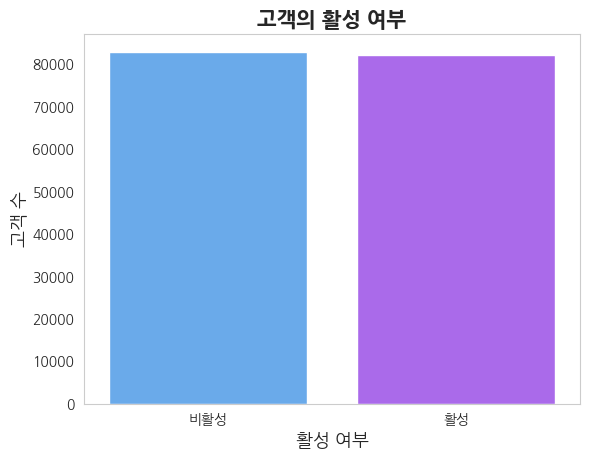

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터에서 'isactivemember' 컬럼을 사용하여 활성/비활성 회원의 분포를 시각화
sns.countplot(x='IsActiveMember', data=df, palette='cool')

# 그리드 추가
plt.grid(axis='y')
plt.title('고객의 활성 여부', fontsize=15, fontweight='bold')
plt.xlabel('활성 여부', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.xticks([0, 1], ['비활성', '활성'])
plt.show()

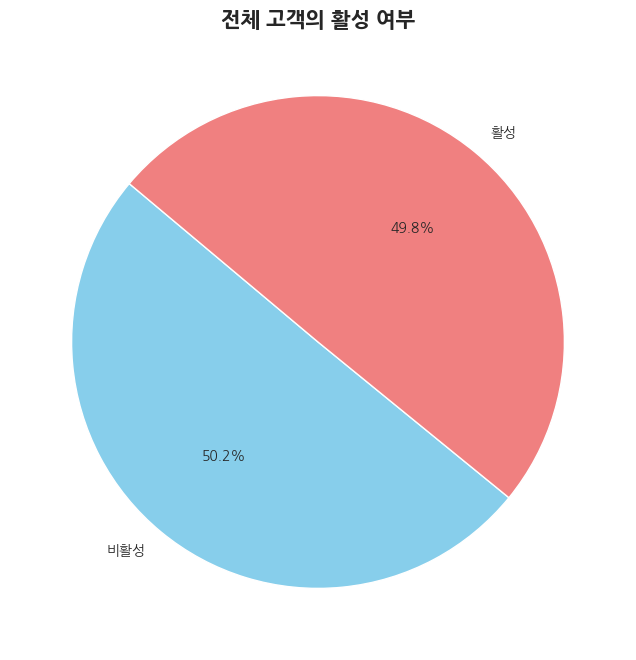

In [30]:
import matplotlib.pyplot as plt

# 데이터프레임에서 'IsActiveMember' 열의 값을 카운트
active_counts = df['IsActiveMember'].value_counts()

# 파이 차트 생성
plt.figure(figsize=(8, 8))
plt.pie(active_counts, labels=['비활성', '활성'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('전체 고객의 활성 여부', fontsize=15, fontweight='bold')

# 그래프 표시
plt.show()


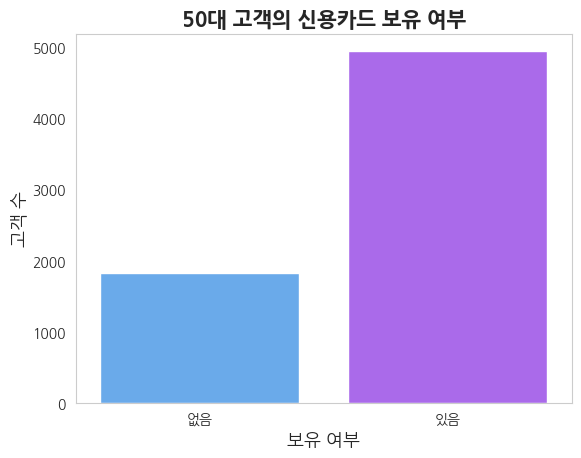

In [31]:
sns.countplot(x='HasCrCard', data=data, palette='cool')

# 그리드 추가
plt.grid(axis='y')
plt.title('50대 고객의 신용카드 보유 여부', fontsize=15, fontweight='bold')
plt.xlabel('보유 여부', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.xticks([0, 1], ['없음', '있음'])
plt.show()

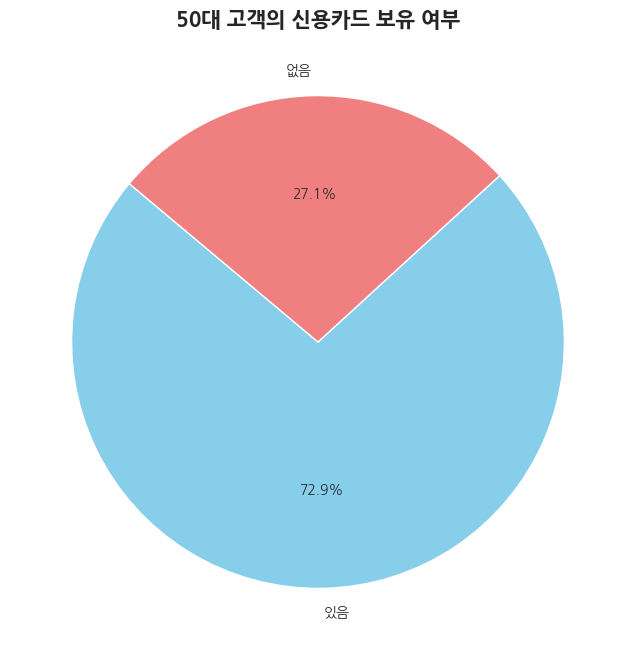

In [32]:
import matplotlib.pyplot as plt

# 데이터프레임에서 'HasCrCard' 열의 값을 카운트
card_counts = data['HasCrCard'].value_counts()

# 파이 차트
plt.figure(figsize=(8, 8))
plt.pie(card_counts, labels=['있음', '없음'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('50대 고객의 신용카드 보유 여부', fontsize=15, fontweight='bold')
plt.show()


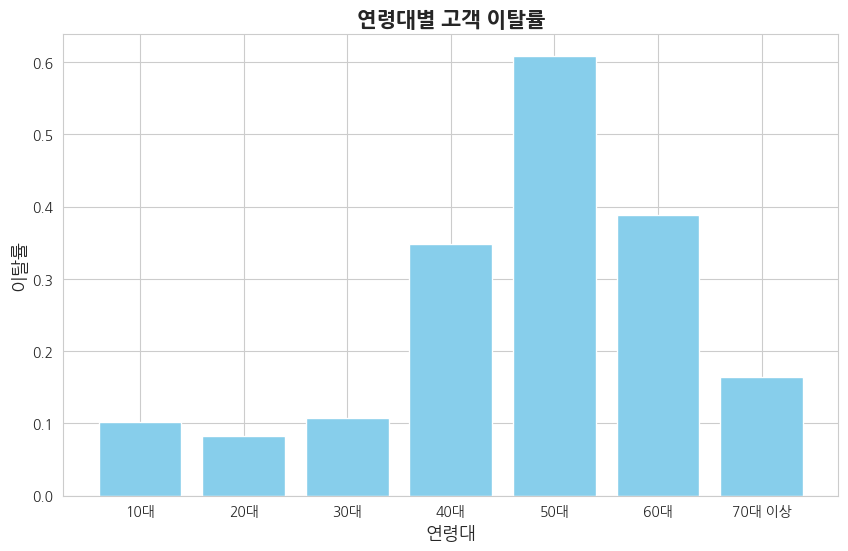

In [33]:
import matplotlib.pyplot as plt
# 연령대에 따라 'AgeGroup' 열 생성
def create_age_group(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    elif age < 70:
        return '60대'
    else:
        return '70대 이상'

df['AgeGroup'] = df['Age'].apply(create_age_group)
# 연령대별 이탈률
AgeGroup = ['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상']
AgeExitRates = []

for i in AgeGroup:
    AgeExited = df.loc[(df['AgeGroup'] == i) & (df['Exited'] == 1) , :].shape[0]
    AgeData = df.loc[df['AgeGroup'] == i].shape[0]
    exit_rate = round(AgeExited / AgeData, 3) if AgeData > 0 else 0
    AgeExitRates.append(exit_rate)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(AgeGroup, AgeExitRates, color='skyblue')
plt.title('연령대별 고객 이탈률', fontsize=15, fontweight='bold')
plt.xlabel('연령대', fontsize=13)
plt.ylabel('이탈률', fontsize=13)
plt.show()


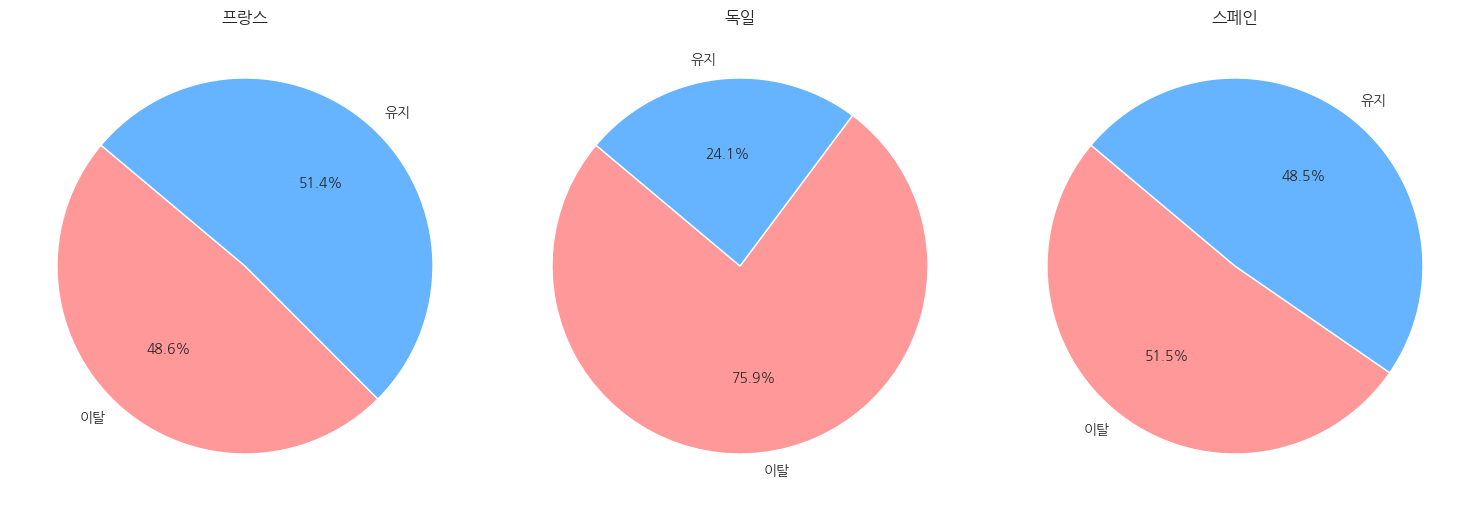

In [34]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = ['Exited', 'Stayed']
france_sizes = [48.6, 51.4]  
germany_sizes = [75.9, 24.1] 
spain_sizes = [51.5, 48.5] 
colors = ['#ff9999','#66b3ff'] 

# 파이 차트 생성
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 프랑스 파이
axs[0].pie(france_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('프랑스')

# 독일 파이
axs[1].pie(germany_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('독일')

# 스페인 파이
axs[2].pie(spain_sizes, labels=['이탈', '유지'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('스페인')

plt.tight_layout()
plt.show()


In [ ]:
sns.countplot(x='HasCrCard', data=df, palette='cool')

# 그리드 추가
plt.grid(axis='y')
plt.title('신용카드 보유 여부', fontsize=15, fontweight='bold')
plt.xlabel('보유 여부', fontsize=13)
plt.ylabel('고객 수', fontsize=13)
plt.xticks([0, 1], ['없음', '있음'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

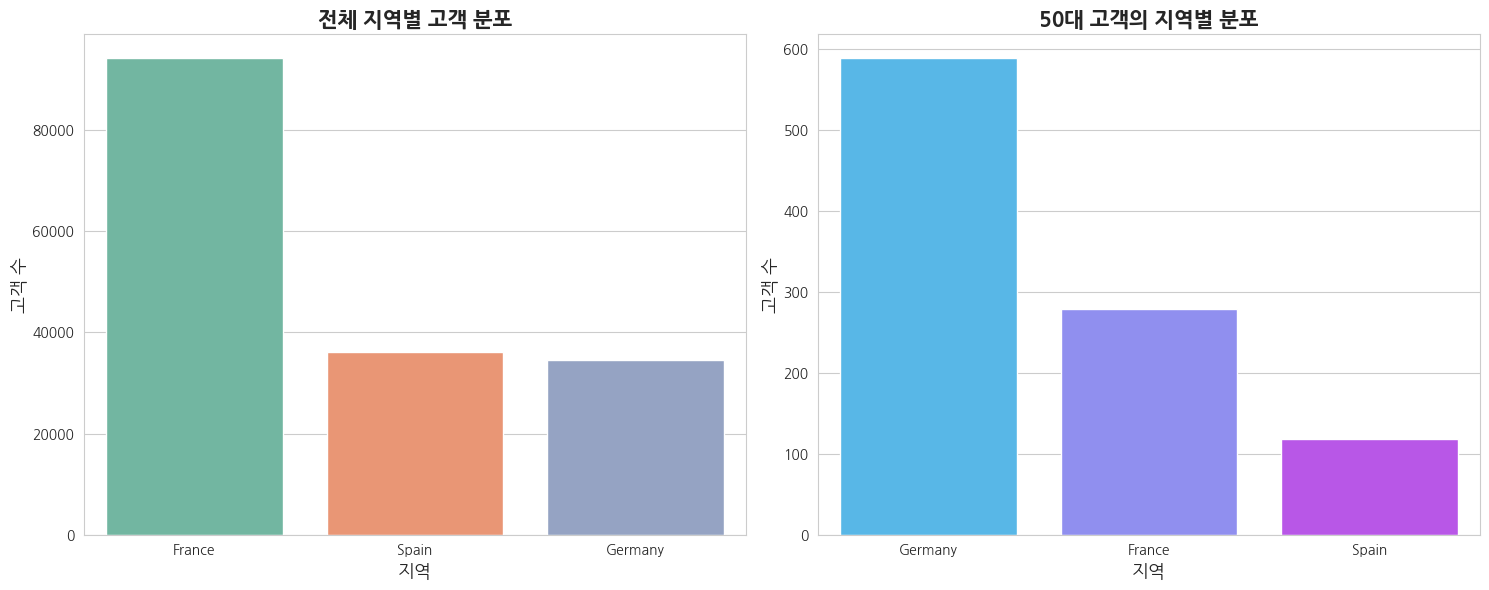

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False 


data = data[data['Age'] == 50]  # 50대만 선택

# 서브플롯 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 전체 지역별 고객 분포
sns.countplot(x='Geography', data=df, palette='Set2', ax=axs[0])
axs[0].set_title('전체 지역별 고객 분포', fontsize=15, fontweight='bold')
axs[0].set_xlabel('지역', fontsize=13)
axs[0].set_ylabel('고객 수', fontsize=13)

# 50대 고객의 지역별 분포
sns.countplot(x='Geography', data=data, palette='cool', ax=axs[1])
axs[1].set_title('50대 고객의 지역별 분포', fontsize=15, fontweight='bold')
axs[1].set_xlabel('지역', fontsize=13)
axs[1].set_ylabel('고객 수', fontsize=13)

# 그래프 간의 간격 조절
plt.tight_layout()

plt.show